In [1]:
import numpy as np
import xarray as xr
import gcsfs
from matplotlib import pyplot as plt
from xgcm import Grid
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import colors as cols
import scipy.special as sp
from intake import open_catalog
import cmocean

In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/channel.yaml")
ds01  = cat["channel_ridge_resolutions_01km"].to_dask()
ds05  = cat["channel_ridge_resolutions_05km"].to_dask()
ds20  = cat["channel_ridge_resolutions_20km"].to_dask()

In [4]:
grid20 = Grid(ds20, periodic='X')
grid05 = Grid(ds05, periodic='X')
grid01 = Grid(ds01, periodic='X') 

In [5]:
horispace01 = 1e3
horispace05 = 5e3
horispace20 = 20e3
time_index = 0
depth = -50
f =  -0.83e-4
daytime = 86400
alpha = 2e-4
gravity = 9.81
ybound = 2e5

In [6]:

depth = 0
vort01_0 = grid01.interp(grid01.interp((grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace01

strain01_0 = ((grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') - grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid01.interp(grid01.interp(grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace01




depth = 0
vort05_0 = grid05.interp(grid05.interp((grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace05

strain05_0 = ((grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'X') - grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid05.interp(grid05.interp(grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'X') + grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace05



depth = 0
vort20_0 = grid20.interp(grid20.interp((grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend')),
                   'X'), 'Y', boundary='extend')/horispace20
strain20_0 = ((grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'X') - grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))**2 + 
          (grid20.interp(grid20.interp(grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'X') + grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'Y', boundary='extend'),
                       'X'), 'Y', boundary='extend'))**2)**0.5/horispace20

<ipython-input-7-5c600ad0d5bf>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(vort01_0.XC.values/1000,vort01_0.YC.values/1000,(vort01_0/f).rename('').isel(time=10), vmax=1,vmin=-1,cmap ='cmo.curl', rasterized=True)


(0.0, 2000.0)

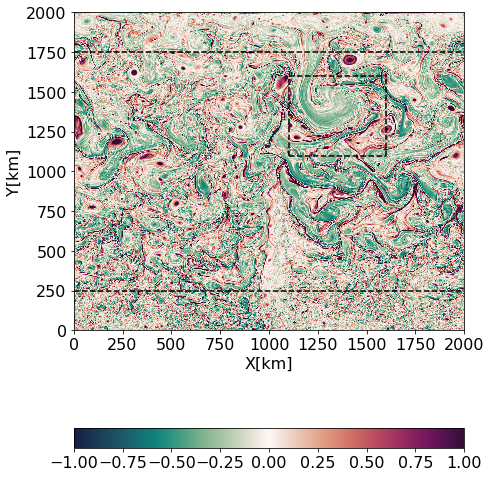

In [7]:
fig, ax = plt.subplots(figsize=(7,9))
im = ax.pcolormesh(vort01_0.XC.values/1000,vort01_0.YC.values/1000,(vort01_0/f).rename('').isel(time=10), vmax=1,vmin=-1,cmap ='cmo.curl', rasterized=True)
ax.set_xlabel("X[km]")
ax.set_ylabel("Y[km]")
fig.colorbar(im, orientation="horizontal", pad=0.2)

ax.plot(np.linspace(12e5,16e5,20)*0+11e5/1000, np.linspace(11e5,16e5,20)/1000, 'k--',linewidth=1.5)
ax.plot(np.linspace(12e5,16e5,20)*0+16e5/1000, np.linspace(11e5,16e5,20)/1000, 'k--',linewidth=1.5)
ax.plot(np.linspace(11e5,16e5,20)/1000, np.linspace(12e5,16e5,20)*0+11e5/1000, 'k--',linewidth=1.5)
ax.plot(np.linspace(11e5,16e5,20)/1000, np.linspace(12e5,16e5,20)*0+16e5/1000, 'k--',linewidth=1.5)
ax.plot(np.linspace(0,2e6,60)/1000, np.linspace(12e5,16e5,60)*0+17.5e5/1000, 'k--')
ax.plot(np.linspace(0,2e6,60)/1000, np.linspace(12e5,16e5,60)*0+2.5e5/1000, 'k--')
ax.set_xlim(0,2000)
ax.set_ylim(0,2000)



<ipython-input-8-e69d523142bd>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(vort05_0.XC.values/1000,vort05_0.YC.values/1000,(vort05_0/f).rename('').isel(time=10), vmax=1, vmin=-1, cmap ='cmo.curl', rasterized=True)


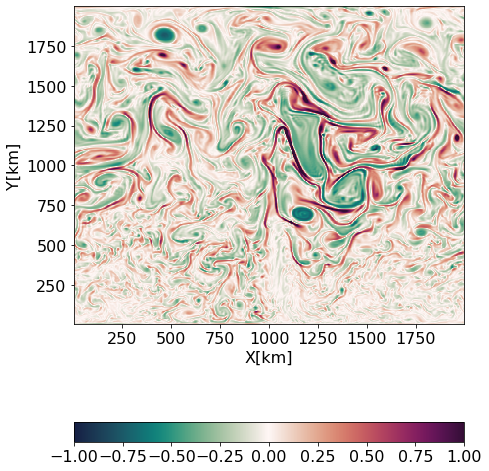

In [8]:

fig, ax = plt.subplots(figsize=(7,9))
im = ax.pcolormesh(vort05_0.XC.values/1000,vort05_0.YC.values/1000,(vort05_0/f).rename('').isel(time=10), vmax=1, vmin=-1, cmap ='cmo.curl', rasterized=True)
ax.set_xlabel("X[km]")
ax.set_ylabel("Y[km]")

fig.colorbar(im, orientation="horizontal", pad=0.2)


<ipython-input-9-0551c9f82669>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(vort20_0.XC.values/1000,vort20_0.YC.values/1000,(vort20_0/f).rename('').isel(time=10), vmax=1, vmin=-1, cmap ='cmo.curl', rasterized=True)


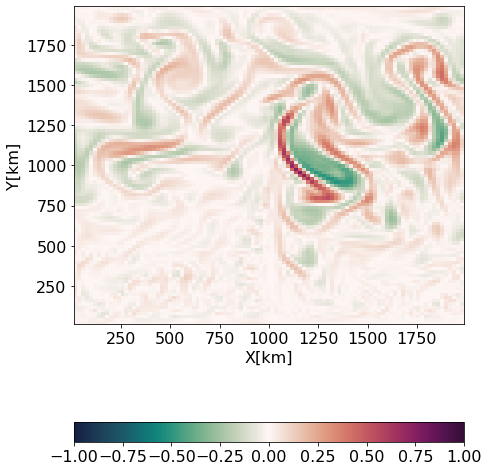

In [9]:
fig, ax = plt.subplots(figsize=(7,9))
im = ax.pcolormesh(vort20_0.XC.values/1000,vort20_0.YC.values/1000,(vort20_0/f).rename('').isel(time=10), vmax=1, vmin=-1, cmap ='cmo.curl', rasterized=True)
ax.set_xlabel("X[km]")
ax.set_ylabel("Y[km]")

fig.colorbar(im, orientation="horizontal", pad=0.2)

<ipython-input-10-ac4b5fe67bd3>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(test01.XC.values/1000,test01.YC.values/1000,(8*(1-test01)).rename(''), vmax=1,vmin=0,cmap ='cmo.haline', rasterized=True)


(0.0, 2000.0)

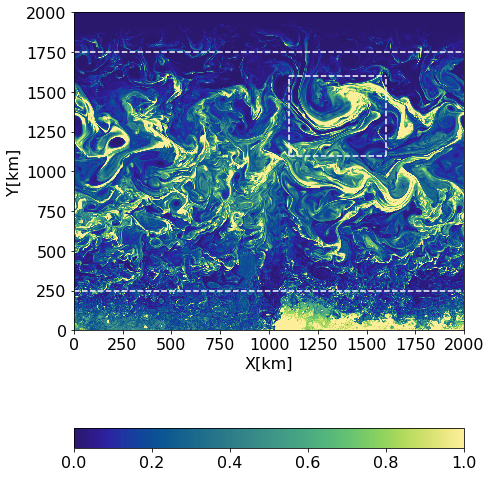

In [10]:
fig, ax = plt.subplots(figsize=(7,9))
test01 = (ds01.PTRACER01.sel(Z=250,method='nearest').isel(time=10))
im = ax.pcolormesh(test01.XC.values/1000,test01.YC.values/1000,(8*(1-test01)).rename(''), vmax=1,vmin=0,cmap ='cmo.haline', rasterized=True)
ax.set_xlabel("X[km]")
ax.set_ylabel("Y[km]")
fig.colorbar(im, orientation="horizontal", pad=0.2)

ax.plot(np.linspace(12e5,16e5,20)*0+11e5/1000, np.linspace(11e5,16e5,20)/1000, 'w--',linewidth=1.5)
ax.plot(np.linspace(12e5,16e5,20)*0+16e5/1000, np.linspace(11e5,16e5,20)/1000, 'w--',linewidth=1.5)
ax.plot(np.linspace(11e5,16e5,20)/1000, np.linspace(12e5,16e5,20)*0+11e5/1000, 'w--',linewidth=1.5)
ax.plot(np.linspace(11e5,16e5,20)/1000, np.linspace(12e5,16e5,20)*0+16e5/1000, 'w--',linewidth=1.5)
ax.plot(np.linspace(0,2e6,60)/1000, np.linspace(12e5,16e5,60)*0+17.5e5/1000, 'w--')
ax.plot(np.linspace(0,2e6,60)/1000, np.linspace(12e5,16e5,60)*0+2.5e5/1000, 'w--')
ax.set_xlim(0,2000)
ax.set_ylim(0,2000)

<ipython-input-11-c38c6cb78f3e>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(test05.XC.values/1000,test05.YC.values/1000,(8*(1-test05)).rename(''), vmax=1,vmin=0, cmap ='cmo.haline', rasterized=True)


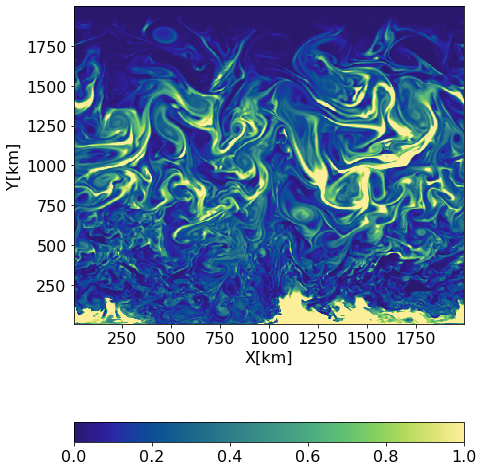

In [11]:
fig, ax = plt.subplots(figsize=(7,9))
test05 = (ds05.PTRACER01.sel(Z=250,method='nearest').isel(time=10))
im = ax.pcolormesh(test05.XC.values/1000,test05.YC.values/1000,(8*(1-test05)).rename(''), vmax=1,vmin=0, cmap ='cmo.haline', rasterized=True)
ax.set_xlabel("X[km]")
ax.set_ylabel("Y[km]")
fig.colorbar(im, orientation="horizontal", pad=0.2)


<ipython-input-12-6645c2e7e9c6>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(test20.XC.values/1000,test20.YC.values/1000,(8*(1-test20)).rename(''), vmax=1,vmin=0, cmap ='cmo.haline', rasterized=True)


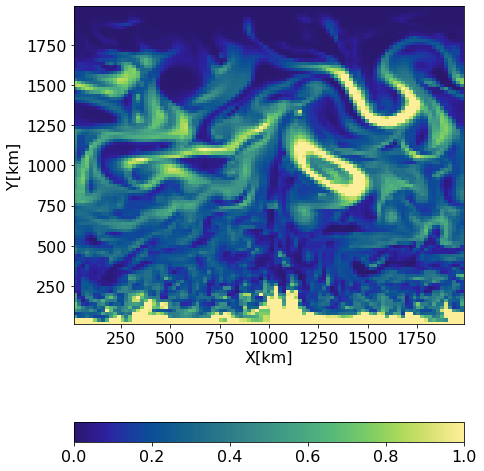

In [12]:
fig, ax = plt.subplots(figsize=(7,9))
test20 = (ds20.PTRACER01.sel(Z=280,method='nearest').isel(time=10))
im = ax.pcolormesh(test20.XC.values/1000,test20.YC.values/1000,(8*(1-test20)).rename(''), vmax=1,vmin=0, cmap ='cmo.haline', rasterized=True)
ax.set_xlabel("X[km]")
ax.set_ylabel("Y[km]")
fig.colorbar(im, orientation="horizontal", pad=0.2)

In [14]:
depth = 0
div01_0 = (grid01.diff(ds01.U.sel(Z=depth,method='nearest'), 'X') + grid01.diff(ds01.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))/horispace01

div05_0 = (grid05.diff(ds05.U.sel(Z=depth,method='nearest'), 'X') + grid05.diff(ds05.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))/horispace05

div20_0 = (grid20.diff(ds20.U.sel(Z=depth,method='nearest'), 'X') + grid20.diff(ds20.V.sel(Z=depth,method='nearest'), 'Y', boundary='extend'))/horispace20


<ipython-input-16-a92c846f088e>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(div01_0.XC.values/1000,div01_0.YC.values/1000,(div01_0/abs(f)).rename('').isel(time=10), vmax=.5, vmin=-.5,cmap ='cmo.balance', rasterized=True)


(0.0, 2000.0)

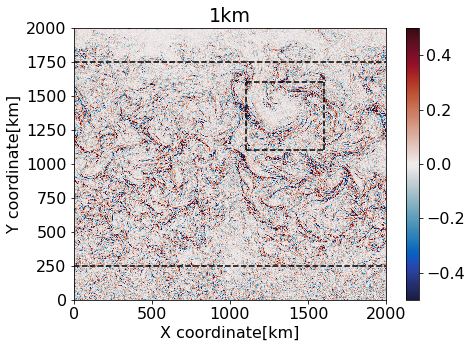

In [16]:
plt.figure(figsize=(7,5))
plt.pcolormesh(div01_0.XC.values/1000,div01_0.YC.values/1000,(div01_0/abs(f)).rename('').isel(time=10), vmax=.5, vmin=-.5,cmap ='cmo.balance', rasterized=True)
plt.title('1km')
plt.xlabel('X coordinate[km]')
plt.ylabel('Y coordinate[km]')
plt.colorbar()

plt.plot(np.linspace(12e5,16e5,20)*0+11e5/1000, np.linspace(11e5,16e5,20)/1000, 'k--',linewidth=1.5)
plt.plot(np.linspace(12e5,16e5,20)*0+16e5/1000, np.linspace(11e5,16e5,20)/1000, 'k--',linewidth=1.5)
plt.plot(np.linspace(11e5,16e5,20)/1000, np.linspace(12e5,16e5,20)*0+11e5/1000, 'k--',linewidth=1.5)
plt.plot(np.linspace(11e5,16e5,20)/1000, np.linspace(12e5,16e5,20)*0+16e5/1000, 'k--',linewidth=1.5)
plt.plot(np.linspace(0,2e6,60)/1000, np.linspace(12e5,16e5,60)*0+17.5e5/1000, 'k--')
plt.plot(np.linspace(0,2e6,60)/1000, np.linspace(12e5,16e5,60)*0+2.5e5/1000, 'k--')
plt.xlim(0,2000)
plt.ylim(0,2000)

<ipython-input-17-6fa76f0695cc>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(div05_0.XC.values/1000,div05_0.YC.values/1000,(div05_0/abs(f)).rename('').isel(time=10), vmax=.5, vmin=-.5,cmap ='cmo.balance', rasterized=True)


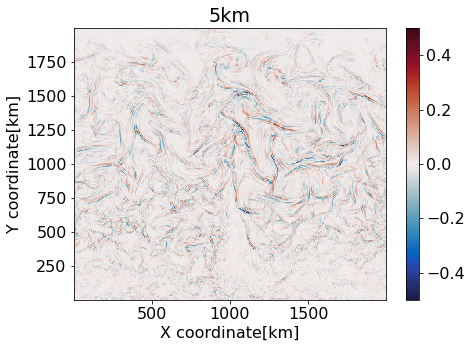

In [17]:
plt.figure(figsize=(7,5))
plt.pcolormesh(div05_0.XC.values/1000,div05_0.YC.values/1000,(div05_0/abs(f)).rename('').isel(time=10), vmax=.5, vmin=-.5,cmap ='cmo.balance', rasterized=True)
plt.title('5km')
plt.xlabel('X coordinate[km]')
plt.ylabel('Y coordinate[km]')
plt.colorbar()

<ipython-input-18-6ca7c06f5297>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(div20_0.XC.values/1000,div20_0.YC.values/1000,(div20_0/abs(f)).rename('').isel(time=10), vmax=.5, vmin=-.5,cmap ='cmo.balance', rasterized=True)


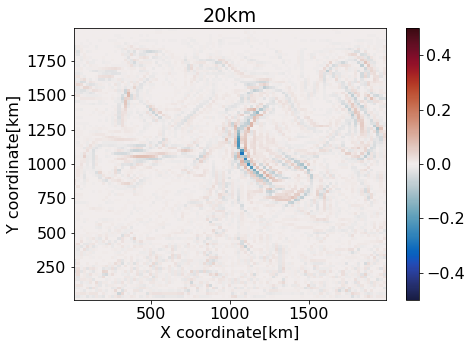

In [18]:
plt.figure(figsize=(7,5))
plt.pcolormesh(div20_0.XC.values/1000,div20_0.YC.values/1000,(div20_0/abs(f)).rename('').isel(time=10), vmax=.5, vmin=-.5,cmap ='cmo.balance', rasterized=True)
plt.title('20km')
plt.xlabel('X coordinate[km]')
plt.ylabel('Y coordinate[km]')
plt.colorbar()

<ipython-input-19-c670d072e32e>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(strain01_0.XC.values/1000,strain01_0.YC.values/1000,(strain01_0/abs(f)).rename('').isel(time=10), vmax=1, vmin=0,cmap ='cmo.thermal', rasterized=True)


(0.0, 2000.0)

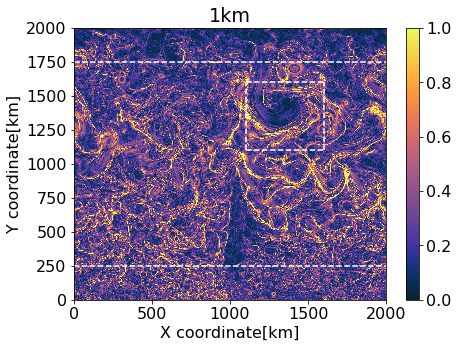

In [19]:
plt.figure(figsize=(7,5))
plt.pcolormesh(strain01_0.XC.values/1000,strain01_0.YC.values/1000,(strain01_0/abs(f)).rename('').isel(time=10), vmax=1, vmin=0,cmap ='cmo.thermal', rasterized=True)
plt.title('1km')
plt.xlabel('X coordinate[km]')
plt.ylabel('Y coordinate[km]')
plt.colorbar()

plt.plot(np.linspace(12e5,16e5,20)*0+11e5/1000, np.linspace(11e5,16e5,20)/1000, 'w--',linewidth=1.5)
plt.plot(np.linspace(12e5,16e5,20)*0+16e5/1000, np.linspace(11e5,16e5,20)/1000, 'w--',linewidth=1.5)
plt.plot(np.linspace(11e5,16e5,20)/1000, np.linspace(12e5,16e5,20)*0+11e5/1000, 'w--',linewidth=1.5)
plt.plot(np.linspace(11e5,16e5,20)/1000, np.linspace(12e5,16e5,20)*0+16e5/1000, 'w--',linewidth=1.5)
plt.plot(np.linspace(0,2e6,60)/1000, np.linspace(12e5,16e5,60)*0+17.5e5/1000, 'w--')
plt.plot(np.linspace(0,2e6,60)/1000, np.linspace(12e5,16e5,60)*0+2.5e5/1000, 'w--')
plt.xlim(0,2000)
plt.ylim(0,2000)

<ipython-input-20-045fa4ae01d8>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(strain05_0.XC.values/1000,strain05_0.YC.values/1000,(strain05_0/abs(f)).rename('').isel(time=10), vmax=1, vmin=0,cmap ='cmo.thermal', rasterized=True)


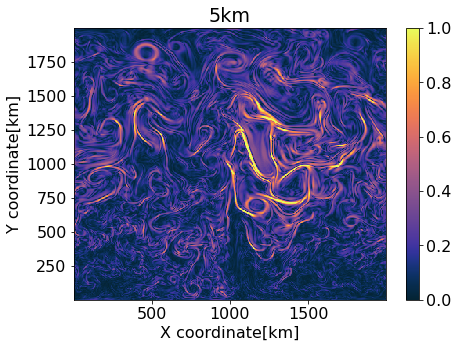

In [20]:
plt.figure(figsize=(7,5))
plt.pcolormesh(strain05_0.XC.values/1000,strain05_0.YC.values/1000,(strain05_0/abs(f)).rename('').isel(time=10), vmax=1, vmin=0,cmap ='cmo.thermal', rasterized=True)
plt.title('5km')
plt.xlabel('X coordinate[km]')
plt.ylabel('Y coordinate[km]')
plt.colorbar()

<ipython-input-21-88d76c75e11b>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(strain20_0.XC.values/1000,strain20_0.YC.values/1000,(strain20_0/abs(f)).rename('').isel(time=10), vmax=1, vmin=0,cmap ='cmo.thermal', rasterized=True)


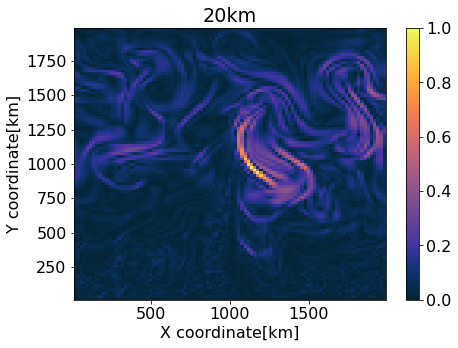

In [21]:
plt.figure(figsize=(7,5))
plt.pcolormesh(strain20_0.XC.values/1000,strain20_0.YC.values/1000,(strain20_0/abs(f)).rename('').isel(time=10), vmax=1, vmin=0,cmap ='cmo.thermal', rasterized=True)
plt.title('20km')
plt.xlabel('X coordinate[km]')
plt.ylabel('Y coordinate[km]')
plt.colorbar()
